# Logistic Regression – Theory

## 1. Definition
Logistic Regression is a **supervised machine learning algorithm** used for **classification tasks**, typically binary classification (0 or 1).  
Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts the **probability of an instance belonging to a class**.

---

## 2. Key Idea
- Logistic Regression uses the **logistic (sigmoid) function** to map predicted values to probabilities between 0 and 1:  

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:

- \(z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n\)  
- \(\sigma(z)\) outputs a probability value for class 1.  

The predicted class is usually determined by a **threshold** (default 0.5):

\[
\text{Predicted class} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{if } \sigma(z) < 0.5
\end{cases}
\]

---

## 3. Applications
- Email spam detection (spam or not)  
- Disease prediction (positive or negative)  
- Customer churn prediction (yes/no)  
- Credit card fraud detection (fraud/not fraud)

---

## 4. Advantages
- Simple and efficient for binary classification.  
- Outputs probabilities, not just classes.  
- Can handle multiple features (multivariate logistic regression).  

---

## 5. Limitations
- Assumes a **linear relationship** between features and log-odds.  
- Not ideal for **non-linear decision boundaries**.  
- Sensitive to **outliers**.  

---

## 6. Model Training
- Logistic Regression is trained by **maximizing the likelihood** (Maximum Likelihood Estimation) instead of minimizing squared error.  
- For iterative training (like epochs), **SGDClassifier** with `loss='log'` can be used.


Epoch	Train Acc	Test Acc
1	0.62		0.50
2	0.88		1.00
3	0.88		1.00
4	0.88		1.00
5	0.88		1.00
6	0.88		1.00
7	0.88		1.00
8	0.88		1.00
9	0.88		1.00
10	0.88		1.00

Final Coefficients: [[ 1.47115958 -1.31922978]]
Final Intercept: [-0.42040467]


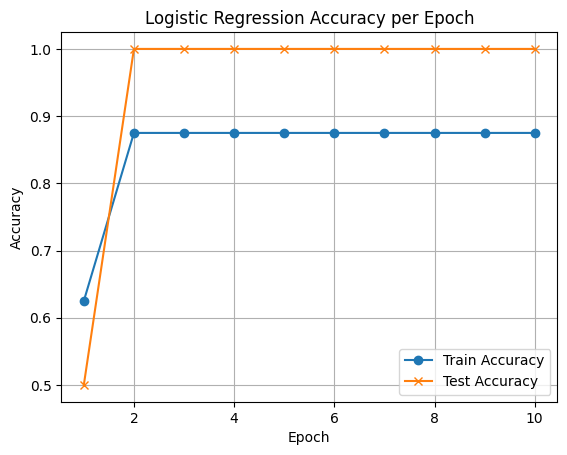

In [3]:
# ==============================
# Logistic Regression with Epoch Processing
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Create Self-Contained Dataset
data = pd.DataFrame({
    'HoursStudied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'HoursSlept': [7, 6, 5, 6, 7, 5, 6, 7, 8, 6],
    'Passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# 3. Define features (X) and target (y)
X = data[['HoursStudied', 'HoursSlept']].values
y = data['Passed'].values

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize SGDClassifier with Logistic Regression (corrected loss function)
sgd_log = SGDClassifier(loss='log_loss', max_iter=1, tol=None, eta0=0.1, learning_rate='constant', random_state=42)

# 6. Train with explicit epochs
epochs = 10
train_acc_list = []
test_acc_list = []

print("Epoch\tTrain Acc\tTest Acc")
for epoch in range(1, epochs+1):
    sgd_log.partial_fit(X_train, y_train, classes=np.array([0,1]))  # one pass over training data

    # Predictions
    y_train_pred = sgd_log.predict(X_train)
    y_test_pred = sgd_log.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"{epoch}\t{train_acc:.2f}\t\t{test_acc:.2f}")

# 7. Final model parameters
print("\nFinal Coefficients:", sgd_log.coef_)
print("Final Intercept:", sgd_log.intercept_)

# 8. Plot Accuracy over epochs
plt.plot(range(1, epochs+1), train_acc_list, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs+1), test_acc_list, label='Test Accuracy', marker='x')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()
